# IMPORTS

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# READING AND VISUALIZING THE DATA

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df = df[["v2",'v1']]
df = df.rename(columns={'v2': 'text', 'v1': 'label'})
df

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
df.duplicated().sum()

403

In [7]:
df.drop_duplicates(inplace=True)


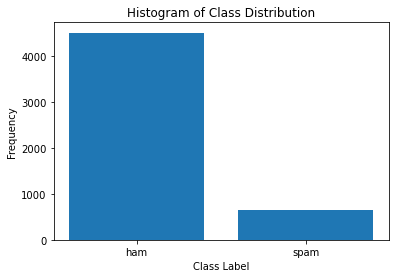

In [8]:
class_counts = df['label'].value_counts()

# Get the unique class labels and their corresponding counts
labels = class_counts.index
counts = class_counts.values

# Create a histogram using matplotlib
plt.bar(labels, counts)

# Set the x-axis label
plt.xlabel('Class Label')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title of the histogram
plt.title('Histogram of Class Distribution')

# Display the histogram
plt.show()

In [9]:
ham_count = 0
spam_count = 0
for mail in df['label']:
    if mail == 'ham':
        ham_count += 1
    elif mail == 'spam':
        spam_count += 1
        
total_count = len(df)
ham_percent = format((ham_count / total_count) * 100, '.2f')
spam_percent = format((spam_count / total_count) * 100, '.2f')


print(f'{ham_percent}% emails among the total mails are ham')
print(f'{spam_percent}% emails among the total mails are spam')

87.37% emails among the total mails are ham
12.63% emails among the total mails are spam


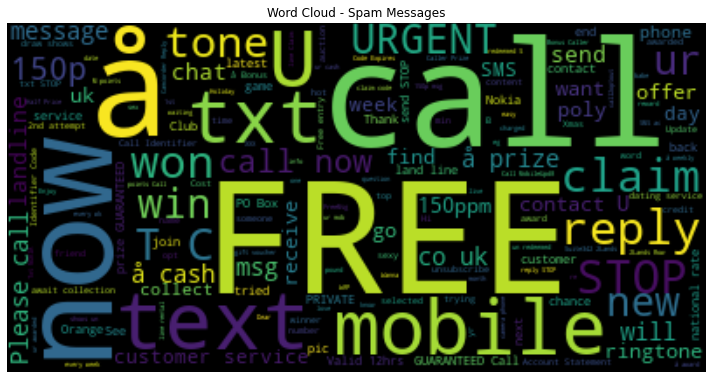

In [10]:
# Concatenate all spam messages into a single string
spam_text = ' '.join(df[df['label'] == 'spam']['text'].tolist())

# Generate the word cloud for spam messages
spam_wordcloud = WordCloud().generate(spam_text)


# Plot the word clouds
plt.figure(figsize=(10, 6))

plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Messages')
plt.axis('off')


plt.tight_layout()
plt.show()


# PREPROCESSING

In [11]:
stop_words = set(stopwords.words("english"))
def clean_abstract(abstract):
    '''Clean the text, with the option to remove stopwords'''
    
    # Convert words to lower case and split them
    abstract = abstract.lower()
    # Clean the text
    abstract = re.sub(r"<br />", " ", abstract)
    abstract = re.sub(r"[^a-z]", " ", abstract)
    abstract = re.sub(r"   ", " ", abstract) # Remove any extra spaces
    abstract = re.sub(r"  ", " ", abstract)
    #remove stopwords
    stops = set(stopwords.words("english"))
    tokenized = word_tokenize(abstract)
    abstract = [w for w in tokenized if not w in stop_words and len(w) > 3]
    abstract = " ".join(abstract)

    # Return a list of words
    return abstract

In [12]:
df['text'] = df['text'].apply(clean_abstract)


In [13]:
df

,text,label
0,jurong point crazy available bugis great world...,ham
1,joking,ham
2,free entry wkly comp final tkts text receive e...,spam
3,early already,ham
4,think goes lives around though,ham
...,...,...
5567,time tried contact pound prize claim easy call...,spam
5568,going esplanade home,ham
5569,pity mood suggestions,ham
5570,bitching acted like interested buying somethin...,ham


# SUPERVISED LEARNING

In [14]:
from sklearn.model_selection import train_test_split
X = df['text']
Y = df['label']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test  = vect.transform(X_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

multNB = MultinomialNB()
multNB.fit(X_train,Y_train)
Y_pred = multNB.predict(X_test)
print(f'The accuracy score of this model is {accuracy_score(Y_test,Y_pred)}')


The accuracy score of this model is 0.9806576402321083


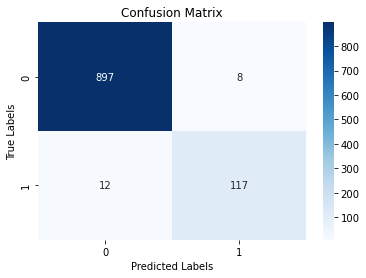

In [17]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the labels and title of the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [18]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
print(f'The accuracy score of this model is {accuracy_score(Y_test,Y_pred)}')


The accuracy score of this model is 0.9671179883945842


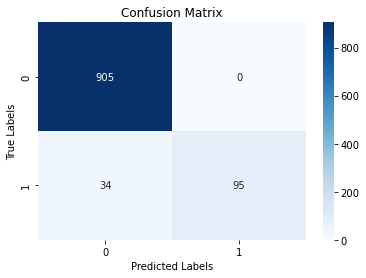

In [19]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the labels and title of the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print(f'The accuracy score of this model is {accuracy_score(Y_test,Y_pred)}')


The accuracy score of this model is 0.9642166344294004


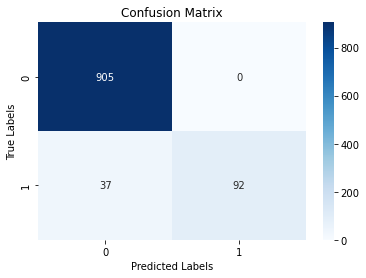

In [32]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the labels and title of the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

# UNSUPERVISED

In [22]:
def create_document_matrix(max_features,max_df) :
    '''
    Input - max_features to keep and maximum document frequency
    Output - trained vectorizer object and matrix
    '''
    ##start code here
    vectorizer = TfidfVectorizer(max_features=max_features, max_df=max_df)
    vectorizer.fit(df.text)
    X = vectorizer.transform(df.text)
    
    return vectorizer, X.toarray()


In [23]:
vectorizer,doc_matrix=create_document_matrix(1000,0.4)
feature_list = vectorizer.get_feature_names()
feature_df = pd.DataFrame(data=doc_matrix, columns=feature_list)
feature_df

Q:\Anaconda3\envs\fyp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abiola,able,access,account,across,actually,address,admirer,afternoon,ahead,...,wrong,xmas,yahoo,yeah,year,years,yest,yesterday,yijue,yoga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# from sklearn.model_selection import train_test_split

# X_train,X_test,Y_train,Y_test = train_test_split(feature_df,df['label'],test_size=0.2,random_state=5)

In [25]:
all_data=pd.DataFrame()
for c in feature_df.columns :
    all_data[c]=feature_df[c]

In [26]:
def do_kmeans(n_clusters) :
    '''
    Input - no. of clusters
    Output - clusting object after fitting on the data
    '''
     ##start code here
    kmeans = KMeans(n_clusters=n_clusters).fit(feature_df)
    return kmeans
    ##end code here
kmean=do_kmeans(2)
kmean.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
all_data['cluster2']=list(kmean.labels_)

In [28]:
def do_pca(n_components) :
    '''
    Input - the no. of components after doing pca
    '''
     ##start code here
        
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(all_data)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    
    return principalDf
    ##end code here

In [29]:
dx = do_pca(2)
dx

,pc1,pc2
0,-0.090666,-0.025250
1,-0.088638,-0.012657
2,-0.071029,-0.030192
3,-0.095543,-0.008014
4,-0.096487,-0.018499
...,...,...
5164,0.956968,0.033066
5165,-0.099808,0.342132
5166,-0.087856,-0.013006
5167,-0.084462,-0.090055


In [33]:
all_data = pd.concat([all_data,dx],axis=1)

In [34]:
def visualize_clusters(cluster_column) :
    '''
    Input - column in all_data dataframe which contains cluster no. for the observations
    '''
     ##start code here
    for_x = all_data['pc1']
    for_y = all_data['pc2']
    sns.scatterplot(x=for_x, y=for_y, hue=cluster_column, 
                data=all_data, s=20);
    plt.legend(loc='lower right');
    ##end code here

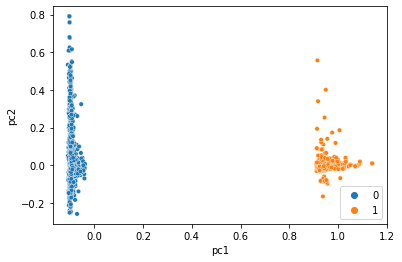

In [35]:
visualize_clusters("cluster2")

In [36]:
df

,text,label
0,jurong point crazy available bugis great world...,ham
1,joking,ham
2,free entry wkly comp final tkts text receive e...,spam
3,early already,ham
4,think goes lives around though,ham
...,...,...
5567,time tried contact pound prize claim easy call...,spam
5568,going esplanade home,ham
5569,pity mood suggestions,ham
5570,bitching acted like interested buying somethin...,ham


In [37]:
# Y_pred = [0 if label == 'spam' else 1 for label in Y_pred]
Y_test = [1 if label == 'spam' else 0 for label in df['label']]

In [38]:
# df['label'] = df['label'].map({'spam': 1, 'ham': 0})

print(f'The accuracy score of this model is {accuracy_score(Y_test,kmean.labels_)}')


The accuracy score of this model is 0.8988198877926098


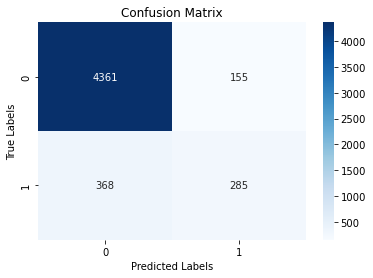

In [39]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, kmean.labels_)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the labels and title of the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [40]:
kmean.labels_

array([0, 0, 0, ..., 0, 0, 0])